In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Initial stage

In [ ]:
import pandas as pd


texas_diab=pd.read_csv(r"/content/drive/MyDrive/Diabetes Dataset texas.csv")

In [ ]:
texas_diab['Age'].mean()

42.85192307692308

In [ ]:
texas_diab['Age']=texas_diab['Age'].fillna(method='bfill')
texas_diab['Education Completed'].mean()

15.078149300155522

In [ ]:
texas_diab.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,...,Other Description (Non-city-based Ethnic),Paper (Non-city-based General),TV/Radio (Non-city-based General),Website (Non-city-based General),Social Networks (Non-city-based General),People (Non-city-based General),Other (Non-city-based General),Other Description (Non-city-based General),Preferred Type,Concerns
0,80314,60.0,NaN,Vietnamese,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60171,60.0,Male,Chinese,Married,13.0,6.0,0,0,Living with children,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011601,23.0,Female,Chinese,Single,16.0,3.0,0,0,0,...,NaN,No,No,No,No,Yes,No,NaN,email,traffic
3,50046,73.0,Female,Chinese,Other,13.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10494,29.0,Male,Asian Indian,Single,17.0,1.0,Living with no one,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#pd.set_option('max_rows', 9999)
a = (texas_diab.isnull().sum(axis=1)/231)*100
#for i in range(0,len(a)):
#  if a[i]>20:
#    texas_diab.drop([i],axis=0, inplace=True)
for i in range(0,len(a)):
  if a[i]>20:
    texas_diab.drop([i],axis=0, inplace=True)


In [ ]:
s=texas_diab.isnull().sum(axis=0)
m=s.to_dict()
new={}
for key,value in m.items():
  if value >1000:
    new[key] = value
columns_del=list(new.keys())
columns_del

['Other Description',
 'Religion Other',
 'Other Employment Description',
 'Occupation Other',
 'Health Info Discription',
 'Housing (Other)',
 'Status of Ownership (Other)',
 'Other Transportation Description',
 'Other Description (City-based)',
 'Other Description (Non-city-based Ethnic)',
 'Other Description (Non-city-based General)',
 'Concerns']

In [ ]:
texas_diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                          24
Ethnicity                                        0
Marital Status                                  13
                                              ... 
People (Non-city-based General)                 25
Other (Non-city-based General)                  27
Other Description (Non-city-based General)    2551
Preferred Type                                 541
Concerns                                      1271
Length: 231, dtype: int64

In [ ]:
diab[diab['Age'].isnull()==True]

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,...,Other Description (Non-city-based Ethnic),Paper (Non-city-based General),TV/Radio (Non-city-based General),Website (Non-city-based General),Social Networks (Non-city-based General),People (Non-city-based General),Other (Non-city-based General),Other Description (Non-city-based General),Preferred Type,Concerns


In [ ]:
diab=texas_diab.dropna(subset=['Diabetes'])

In [ ]:
from math import ceil
age_gen=diab.loc[(diab['Arthritis']== 'Yes') & (diab['Spouse']=='Living with spouse')& (diab['Ethnicity']== 'Vietnamese')]
age_imp=age_gen['Age'].mean()
gen_imp=age_gen['Gender'].mode()

diab.loc[(diab['Survey ID']==80436) & (diab['Age'].isna()==True ), 'Age'] = age_imp
diab.loc[(diab['Survey ID']==80436) & (diab['Gender'].isna()==True ), 'Gender'] = "Male"

print(diab.loc[(diab['Survey ID']==80436)])

      Survey ID   Age Gender   Ethnicity Marital Status  Education Completed  \
1873      80436  37.0   Male  Vietnamese        Married                  8.0   

      Household Size No One              Spouse Children  ...  \
1873             2.0      0  Living with spouse        0  ...   

     Other Description (Non-city-based Ethnic) Paper (Non-city-based General)  \
1873                                       NaN                             No   

      TV/Radio (Non-city-based General) Website (Non-city-based General)  \
1873                                Yes                               No   

      Social Networks (Non-city-based General)  \
1873                                        No   

     People (Non-city-based General)  Other (Non-city-based General)  \
1873                              No                              No   

     Other Description (Non-city-based General) Preferred Type Concerns  
1873                                        NaN        Website      NaN 

In [ ]:
age=diab.loc[(diab['Ethnicity']== 'Vietnamese') & (diab['Spouse']=='Living with spouse') & (diab['Children']=='Living with children') & (diab['Gender']=='Female') & (diab['Religion']=='Buddhist')]
age_imp=round(age['Age'].mean())
diab.loc[(diab['Survey ID']==80242) & (diab['Age'].isna()==True ), 'Age'] = age_imp
print(diab.loc[(diab['Survey ID']==80242)])

      Survey ID   Age  Gender   Ethnicity Marital Status  Education Completed  \
1945      80242  25.0  Female  Vietnamese        Married                 12.0   

      Household Size No One              Spouse              Children  ...  \
1945             4.0      0  Living with spouse  Living with children  ...   

     Other Description (Non-city-based Ethnic) Paper (Non-city-based General)  \
1945                                       NaN                             No   

      TV/Radio (Non-city-based General) Website (Non-city-based General)  \
1945                                 No                               No   

      Social Networks (Non-city-based General)  \
1945                                        No   

     People (Non-city-based General)  Other (Non-city-based General)  \
1945                              No                              No   

     Other Description (Non-city-based General)     Preferred Type Concerns  
1945                                    

In [ ]:
age=diab.loc[(diab['Ethnicity']== 'Vietnamese') & (diab['No One']=='Living with no one') & (diab['Gender']=='Male') & (diab['Religion']=='Buddhist')]
age_imp=round(age['Age'].mean())
diab.loc[(diab['Survey ID']==8043901) & (diab['Age'].isna()==True ), 'Age'] = age_imp
print(diab.loc[(diab['Survey ID']==8043901)])

      Survey ID   Age Gender   Ethnicity Marital Status  Education Completed  \
2023    8043901  41.0   Male  Vietnamese         Single                 16.0   

      Household Size              No One Spouse Children  ...  \
2023             1.0  Living with no one      0        0  ...   

     Other Description (Non-city-based Ethnic) Paper (Non-city-based General)  \
2023                                       NaN                             No   

      TV/Radio (Non-city-based General) Website (Non-city-based General)  \
2023                                 No                               No   

      Social Networks (Non-city-based General)  \
2023                                        No   

     People (Non-city-based General)  Other (Non-city-based General)  \
2023                              No                              No   

     Other Description (Non-city-based General) Preferred Type Concerns  
2023                                        NaN            NaN      NaN 

In [ ]:
age=diab.loc[(diab['Ethnicity']== 'Filipino') & (diab['Marital Status']=='Single') & (diab['Gender']=='Female') & (diab['Religion']=='Catholic')]
age_imp=round(age['Age'].mean())

diab.loc[(diab['Survey ID']==100040129) & (diab['Age'].isna()==True ), 'Age'] = age_imp
print(diab.loc[(diab['Survey ID']==100040129)])

      Survey ID   Age  Gender Ethnicity Marital Status  Education Completed  \
2308  100040129  46.0  Female  Filipino         Single                 17.0   

      Household Size              No One Spouse Children  ...  \
2308             1.0  Living with no one      0        0  ...   

     Other Description (Non-city-based Ethnic) Paper (Non-city-based General)  \
2308                                       NaN                             No   

      TV/Radio (Non-city-based General) Website (Non-city-based General)  \
2308                                 No                               No   

      Social Networks (Non-city-based General)  \
2308                                       Yes   

     People (Non-city-based General)  Other (Non-city-based General)  \
2308                              No                              No   

     Other Description (Non-city-based General)    Preferred Type Concerns  
2308                                        NaN  newspaper/online      

In [ ]:
age=diab.loc[(diab['Ethnicity']== 'Filipino') & (diab['Marital Status']=='Married') & (diab['Gender']=='Male') & (diab['Religion']=='Catholic')]
age_imp=round(age['Age'].mean())

diab.loc[(diab['Survey ID']==11089) & (diab['Age'].isna()==True ), 'Age'] = age_imp
print(diab.loc[(diab['Survey ID']==11089)])

      Survey ID   Age Gender Ethnicity Marital Status  Education Completed  \
2322      11089  40.0   Male  Filipino        Married                 16.0   

      Household Size No One              Spouse              Children  ...  \
2322             3.0      0  Living with spouse  Living with children  ...   

     Other Description (Non-city-based Ethnic) Paper (Non-city-based General)  \
2322                                       NaN                             No   

      TV/Radio (Non-city-based General) Website (Non-city-based General)  \
2322                                Yes                              Yes   

      Social Networks (Non-city-based General)  \
2322                                       Yes   

     People (Non-city-based General)  Other (Non-city-based General)  \
2322                              No                              No   

     Other Description (Non-city-based General)      Preferred Type  \
2322                                        NaN  Webs

<ipython-input-56-61767a1964bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab['Age'])


<Axes: xlabel='Age', ylabel='Density'>

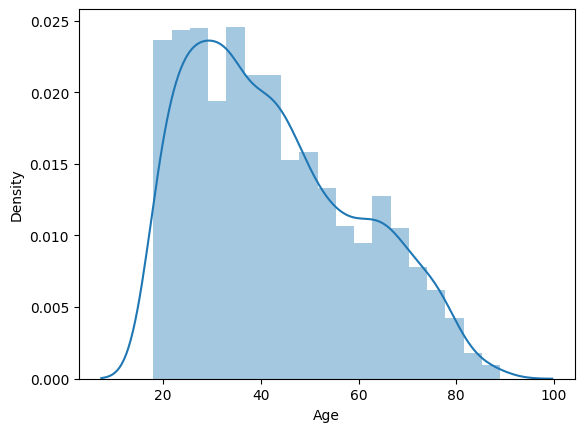

In [ ]:
import seaborn as sns
sns.distplot(diab['Age'])

In [ ]:
#pd.set_option('max_rows',99)
diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                          23
Ethnicity                                        0
Marital Status                                  13
                                              ... 
People (Non-city-based General)                 24
Other (Non-city-based General)                  26
Other Description (Non-city-based General)    2525
Preferred Type                                 535
Concerns                                      1258
Length: 231, dtype: int64

In [ ]:
diab['Gender'].value_counts()

Female    1384
Male      1131
Name: Gender, dtype: int64

In [ ]:
feature_name='Age'

male_counts = diab.loc[diab.Gender.values == 'Male', feature_name].value_counts()
female_counts = diab.loc[diab.Gender.values == 'Female', feature_name].value_counts()

print("Male age Group: ", male_counts)
print("Female age Group:", female_counts)

Male age Group:  32.0    47
25.0    41
30.0    40
40.0    35
35.0    34
        ..
84.0     2
89.0     2
86.0     1
87.0     1
85.0     1
Name: Age, Length: 72, dtype: int64
Female age Group: 25.0    41
19.0    38
41.0    38
21.0    36
44.0    35
        ..
79.0     3
89.0     2
83.0     1
84.0     1
88.0     1
Name: Age, Length: 69, dtype: int64


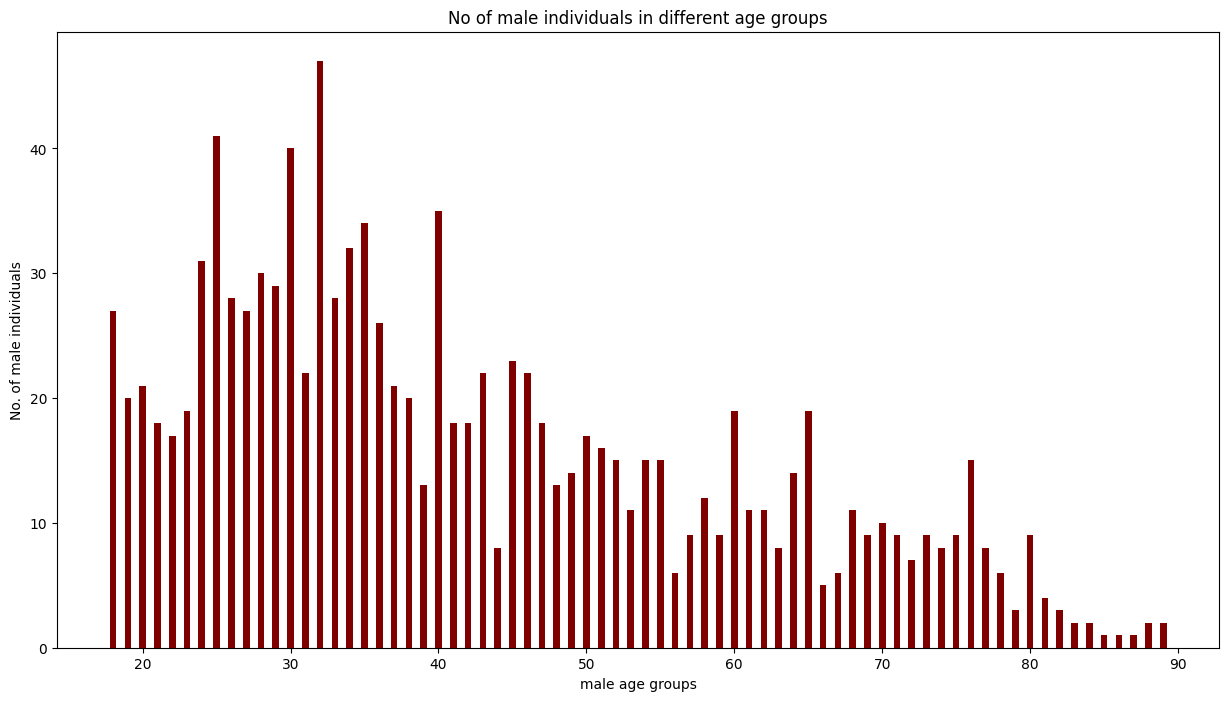

In [ ]:
import matplotlib.pyplot as plt
a=male_counts.to_dict()
nm = list(a.values())
m = list(a.keys())

fig = plt.figure(figsize = (15, 8))

# creating the bar plot
plt.bar(m,nm, color ='maroon',
        width = 0.45)

plt.xlabel("male age groups")
plt.ylabel("No. of male individuals")
plt.title("No of male individuals in different age groups")
plt.show()

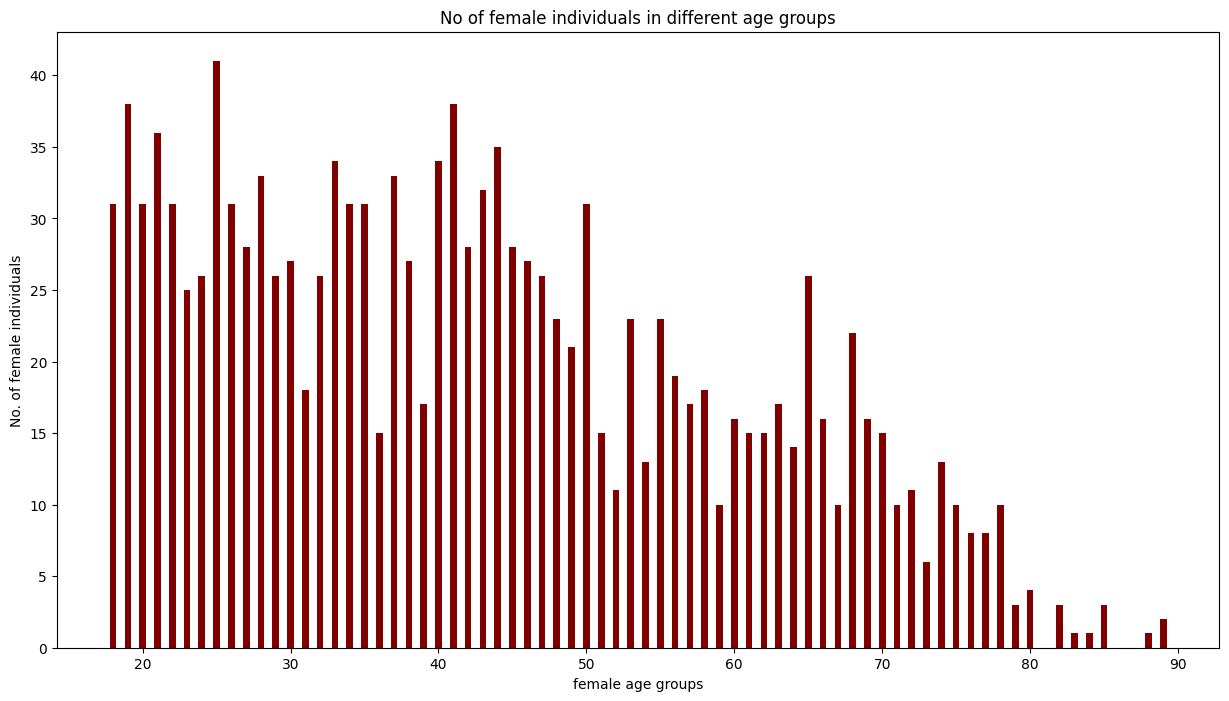

In [ ]:
import matplotlib.pyplot as plt
a=female_counts.to_dict()
nm = list(a.values())
m = list(a.keys())

fig = plt.figure(figsize = (15, 8))

# creating the bar plot
plt.bar(m,nm, color ='maroon',
        width = 0.45)

plt.xlabel("female age groups")
plt.ylabel("No. of female individuals")
plt.title("No of female individuals in different age groups")
plt.show()

In [ ]:
diab['Marital Status'].value_counts()

Married                  1681
Single                    711
Living with a partner     107
Other                      26
Name: Marital Status, dtype: int64

In [ ]:
 def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    a=list(data[f1].unique())
    # find no of unique values in education columns
    b=list(data[f2].unique())
    dataframes=[]
    for e in b:
        dfe=data[data[f2]==e]
        # https://www.youtube.com/watch?v=qy0fDqoMJx8 for groupby operation
        #https://www.youtube.com/watch?v=hfDXRyYIFkk grupby count
        #https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
        dfea=dfe.groupby(f1).count()[f2]
        dataframes.append(dfea)
        #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    xx=pd.concat(dataframes,axis=1)
    xx.columns=b
    xx=xx.fillna(0)
    return xx

In [ ]:
diab.loc[(diab['Age']>45) & (diab['Marital Status'].isna()==True ), 'Marital Status'] = 'Married'
diab.loc[(diab['Age']<25) & (diab['Marital Status'].isna()==True ), 'Marital Status'] = 'Single'

In [ ]:
diab.loc[(diab['Marital Status'].isna()==True ), 'Marital Status'] = 'Married'

In [ ]:
#pd.set_option('max_rows', 999)
diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                          23
Ethnicity                                        0
Marital Status                                   0
                                              ... 
People (Non-city-based General)                 24
Other (Non-city-based General)                  26
Other Description (Non-city-based General)    2525
Preferred Type                                 535
Concerns                                      1258
Length: 231, dtype: int64

In [ ]:
diab['Marital Status'].value_counts()

Married                  1693
Single                    712
Living with a partner     107
Other                      26
Name: Marital Status, dtype: int64

In [ ]:
diab.groupby(['Gender','Ethnicity','Marital Status'],dropna=False).Ethnicity.count()

Gender  Ethnicity     Marital Status       
Female  Asian Indian  Living with a partner     15
                      Married                  172
                      Other                      1
                      Single                    38
        Chinese       Living with a partner      6
                      Married                  237
                      Other                      3
                      Single                   106
        Filipino      Living with a partner      4
                      Married                  106
                      Other                      2
                      Single                    66
        Korean        Living with a partner      6
                      Married                  200
                      Other                      9
                      Single                    59
        Other         Living with a partner      1
                      Married                   48
                      Other           

# Imputing Gender based on population

In [ ]:
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Asian Indian')& (diab['Marital Status']=='Married'), 'Gender'] = 'Male'

In [ ]:
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Chinese')& (diab['Marital Status']=='Living with a partner'), 'Gender'] = 'Male'
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Chinese')& (diab['Marital Status']=='Married'), 'Gender'] = 'Female'
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Chinese')& (diab['Marital Status']=='Single'), 'Gender'] = 'Female'

In [ ]:
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Filipino')& (diab['Marital Status']=='Married'), 'Gender'] = 'Female'
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Filipino')& (diab['Marital Status']=='Single'), 'Gender'] = 'Female'

In [ ]:
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Vietnamese')& (diab['Marital Status']=='Married'), 'Gender'] = 'Female'
diab.loc[(diab['Gender'].isna()==True ) & (diab['Ethnicity']=='Vietnamese')& (diab['Marital Status']=='Single'), 'Gender'] = 'Female'

In [ ]:
diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                           0
Ethnicity                                        0
Marital Status                                   0
                                              ... 
People (Non-city-based General)                 24
Other (Non-city-based General)                  26
Other Description (Non-city-based General)    2525
Preferred Type                                 535
Concerns                                      1258
Length: 231, dtype: int64

In [ ]:
diab['Education Completed'].skew()

-1.7691185421450792

0    17.0
Name: Education Completed, dtype: float64


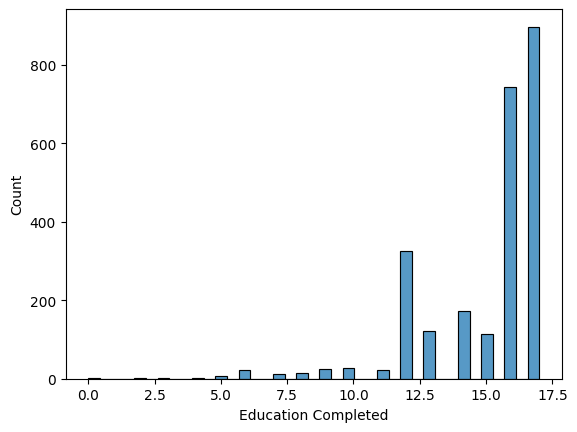

In [ ]:
sns.histplot(diab['Education Completed'])
print(diab['Education Completed'].mode())
diab.loc[(diab['Education Completed'].isna()==True ), 'Education Completed'] = 17.0
#diab['Education Completed'] = diab['Education Completed'].fillna(diab['Education Completed'].mode())

In [ ]:
diab['Education Completed'].skew()

-1.782483750483499

In [ ]:
import numpy as np
diab['Education Completed'] = diab['Education Completed'].apply(lambda x: np.power(x,3))


<ipython-input-77-88f4e90f748d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab['Education Completed'] = diab['Education Completed'].apply(lambda x: np.power(x,3))


In [ ]:
diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                           0
Ethnicity                                        0
Marital Status                                   0
                                              ... 
People (Non-city-based General)                 24
Other (Non-city-based General)                  26
Other Description (Non-city-based General)    2525
Preferred Type                                 535
Concerns                                      1258
Length: 231, dtype: int64

3.0


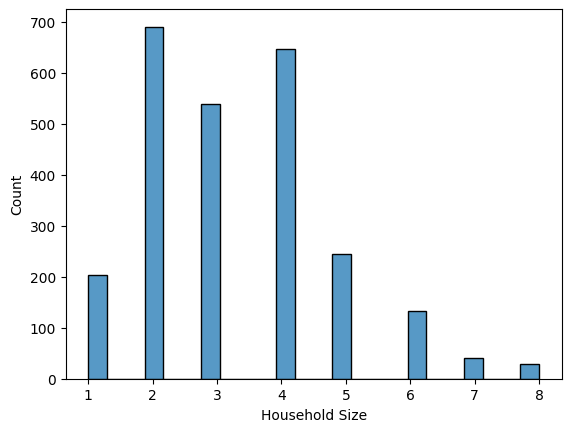

In [ ]:
sns.histplot(diab['Household Size'])
print(diab['Household Size'].median())
diab.loc[(diab['Household Size'].isna()==True ), 'Household Size'] = 3.0

In [ ]:
diab.isnull().sum()

Survey ID                                        0
Age                                              0
Gender                                           0
Ethnicity                                        0
Marital Status                                   0
                                              ... 
People (Non-city-based General)                 24
Other (Non-city-based General)                  26
Other Description (Non-city-based General)    2525
Preferred Type                                 535
Concerns                                      1258
Length: 231, dtype: int64

In [ ]:
diab['Brother/Sister'].value_counts()

0                               2362
Living with brothers/sisters     175
Name: Brother/Sister, dtype: int64

# Square root transform

In [ ]:
from scipy import stats
import numpy as np

diab['Household Size'] = diab['Household Size'].apply(lambda x: np.sqrt(x))
diab['Household Size'].skew()

<ipython-input-82-52f8195b844c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab['Household Size'] = diab['Household Size'].apply(lambda x: np.sqrt(x))


0.07861081630087297

In [ ]:
diab.loc[(diab['Grandparent'].isna()==True ), 'Grandparent'] = 'Living with Grandparent'

In [ ]:
diab.loc[(diab['Other Relative'].isna()==True ), 'Other Relative'] = 'Living with Other Relative'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diab.drop(['Other Description',
 'Religion Other',
 'Other Employment Description',
 'Occupation Other',
 'Health Info Discription',
 'Housing (Other)',
 'Status of Ownership (Other)',
 'Other Transportation Description',
 'Other Description (City-based)',
 'Other Description (Non-city-based Ethnic)',
 'Other Description (Non-city-based General)',
 'Concerns'],axis=1, inplace=True)

<ipython-input-86-0940b549f47f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab.drop(['Other Description',


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
                                           ... 
Website (Non-city-based General)             24
Social Networks (Non-city-based General)     24
People (Non-city-based General)              24
Other (Non-city-based General)               26
Preferred Type                              535
Length: 219, dtype: int64

In [ ]:
diab.rename(columns = {'Other':'Source of Health Information', 'Other ':'Living with?'}, inplace = True)

<ipython-input-88-d745b1d4577d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab.rename(columns = {'Other':'Source of Health Information', 'Other ':'Living with?'}, inplace = True)


In [ ]:
diab.drop(['Living with?'],axis=1, inplace=True)

<ipython-input-89-89fe4a7ebc3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diab.drop(['Living with?'],axis=1, inplace=True)


In [ ]:
diab['Religion'].value_counts()

Protestant    626
None          501
Catholic      476
Hindu         466
Buddhist      341
Muslim         66
Other          44
Name: Religion, dtype: int64

In [ ]:
diab.loc[(diab['Religion'].isna()==True ), 'Religion'] = 'Other'

In [ ]:
diab['Religion'].value_counts()

Protestant    626
None          501
Catholic      476
Hindu         466
Buddhist      341
Muslim         66
Other          62
Name: Religion, dtype: int64

In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
                                           ... 
Website (Non-city-based General)             24
Social Networks (Non-city-based General)     24
People (Non-city-based General)              24
Other (Non-city-based General)               26
Preferred Type                              535
Length: 218, dtype: int64

In [ ]:
diab[diab['Full Time Employment'].isnull()].iloc[:,:20]

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,Grand Children,Parent,Grandparent,Brother/Sister,Other Relative,Friends,Religion,Full Time Employment,Part Time Employment,Self Employed Full Time
1275,70338,43.0,Male,Korean,Married,4096.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,0.0,0,Protestant,NaN,NaN,NaN
1584,70466,81.0,Male,Korean,Living with a partner,216.0,1.732051,0,0,Living with children,Living with grandchildren,0,0.0,Living with brothers/sisters,0.0,0,Protestant,NaN,NaN,NaN
1622,70511,68.0,Female,Korean,Single,4096.0,1.414214,0,0,Living with children,0,0,0.0,0,0.0,0,Protestant,NaN,NaN,NaN


In [ ]:
diab.iloc[1200:1700,:20]

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,Grand Children,Parent,Grandparent,Brother/Sister,Other Relative,Friends,Religion,Full Time Employment,Part Time Employment,Self Employed Full Time
1236,70063,36.0,Female,Korean,Married,4096.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,0.0,0,Protestant,0,0,0.0
1237,70222,57.0,Female,Korean,Married,1728.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,0.0,0,Protestant,0,Employed part time,0.0
1238,70309,47.0,Male,Korean,Married,4913.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,0.0,0,None,0,0,0.0
1239,70293,58.0,Female,Korean,Married,1728.0,1.414214,0,Living with spouse,0,0,0,0.0,0,0.0,0,None,0,Employed part time,0.0
1241,10313,74.0,Male,Korean,Married,2744.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,Living with Other Relative,0,Protestant,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,80171,23.0,Male,Vietnamese,Single,3375.0,2.000000,Living with no one,0,0,0,0,0.0,0,0.0,0,None,0,0,0.0
1747,80487,70.0,Female,Vietnamese,Living with a partner,729.0,2.828427,0,0,Living with children,0,0,0.0,0,0.0,0,Buddhist,0,0,0.0
1748,8022501,55.0,Male,Vietnamese,Married,1728.0,1.414214,0,Living with spouse,0,0,0,0.0,0,0.0,0,None,0,0,0.0
1749,80421,30.0,Female,Vietnamese,Married,2197.0,2.000000,0,Living with spouse,Living with children,0,0,0.0,0,0.0,0,Buddhist,0,0,0.0


In [ ]:
import pandas as pd

diab.to_csv('diab.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd

db=pd.read_csv(r"/content/drive/MyDrive/diab.csv")
db[db['Self Employed Full Time'].isnull()].iloc[:,:21]

In [ ]:
pd.set_option('max_rows', 999)
diab[diab['Self Employed Full Time'].isnull()].iloc[:,:21]

In [ ]:
diab[diab['Full Time Employment'].isnull()].iloc[:,:20]

In [ ]:
diab.groupby(['Gender','Ethnicity','Marital Status'],dropna=False).Ethnicity.count()

In [ ]:
diab.loc[(diab['Self Employed Full Time'].isna()==True ), 'Self Employed Full Time'] = 'Self Employed Full Time'
diab.loc[(diab['Self Employed Part Time'].isna()==True ), 'Self Employed Part Time'] = 'Self Employed Part Time'

In [ ]:
diab.isnull().sum()

In [ ]:
diab[diab['Retired'].isnull()== True]

In [ ]:
diab.loc[(diab['Retired'].isna()==True ) & (diab['Survey ID']==70466), 'Retired'] = 'Retired'
diab.loc[(diab['Retired'].isna()==True ) & (diab['Survey ID']==70511), 'Retired'] = 'Retired'
diab.loc[(diab['Retired'].isna()==True ) & (diab['Survey ID']==70338), 'Retired'] = 0



#Imputing unemployed

In [ ]:


diab[diab['Unemployed'].isnull()== True]
#diab.loc[(diab['Unemployed'].isna()==True ) & (diab['Age']<20), 'Unemployed'] = 'Unemployed'
#index = 194 1599 1745 1786 1896 2008 2226
#Survey ID =  40140, 10286,
diab.loc[(diab['Unemployed']!=0)]

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,...,Social Networks (Non-city-based Ethnic),People (Non-city-based Ethnic),Other (Non-city-based Ethnic),Paper (Non-city-based General),TV/Radio (Non-city-based General),Website (Non-city-based General),Social Networks (Non-city-based General),People (Non-city-based General),Other (Non-city-based General),Preferred Type
2,1011601,23.0,Female,Chinese,Single,3.245186e+32,1.732051,0,0,0,...,No,Yes,No,No,No,No,No,Yes,No,email
63,50148,25.0,Female,Chinese,Single,3.245186e+32,1.414214,0,0,0,...,Yes,No,No,No,No,No,No,No,No,Internet
148,50224,61.0,Female,Chinese,Single,1.192533e+30,1.000000,Living with no one,0,0,...,No,No,No,No,Yes,No,No,No,No,telephone
165,60064,32.0,Female,Chinese,Married,1.667711e+33,1.414214,0,Living with spouse,0,...,No,No,No,No,No,No,No,No,No,network
167,60139,39.0,Female,Chinese,Married,1.373706e+29,1.414214,0,Living with spouse,0,...,No,No,No,Yes,Yes,Yes,No,No,No,NaN
194,40140,18.0,Male,Chinese,Single,1.000000e+27,2.000000,0,0,0,...,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,website
204,60101,72.0,Female,Chinese,Married,1.023490e+21,2.236068,0,Living with spouse,Living with children,...,No,No,No,No,No,No,No,No,No,TV
222,50230,25.0,Female,Chinese,Single,1.667711e+33,1.000000,Living with no one,0,0,...,No,No,No,No,No,Yes,No,No,No,internet
241,60074,24.0,Female,Chinese,Living with a partner,1.667711e+33,1.414214,0,0,0,...,No,No,No,No,No,No,No,No,No,internet
267,10063,25.0,Male,Chinese,Single,1.667711e+33,1.414214,0,0,0,...,No,No,No,Yes,No,Yes,No,No,No,Email


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab.loc[(diab['Student'].isna()== True)]
diab['Student'].value_counts()
diab.loc[(diab['Student'].isna()== True) , 'Student']=0
#diab.loc[(diab['Disabled'].isna()== True) & (diab['Marital Status']=='Single') & (diab['Gender']=='Female') & (diab['Religion']=='Catholic')]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.loc[(diab['Disabled'].isna()== True) & (diab['Age']>55), 'Disabled']='Disabled'
diab.loc[(diab['Disabled'].isna()== True), 'Disabled']= 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab.loc[(diab['Homemaker'].isna()== True), 'Homemaker']='Full time homemaker'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#diab.loc[(diab[''].isna()== True) & (diab['Marital Status']=='Single') & (diab['Gender']=='Female') & (diab['Religion']=='Catholic')]

#Imputing Income

In [ ]:
diab.loc[(diab['Income'].isna()== True) & (diab['Retired']=='Retired'), 'Income']= '$0 - $9,999'
diab.loc[(diab['Income'].isna()== True) & (diab['Age']> 60), 'Income']= '$0 - $9,999'
#diab.loc[(diab['Income'].isna()== True) & (diab['']=='Retired'), 'Income']= '$0 - $9,999'

#diab.loc[(diab['Income'].isna()== True) & (diab['']> 60), 'Income']
ten_k=diab.loc[(diab['Income']=='$10,000 - $19,999')]
ten_k['Occupation'].mode() #Other

twen_k=diab.loc[(diab['Income']=='$20,000 - $29,999')]
twen_k['Occupation'].mode() #Service worker

thi_k=diab.loc[(diab['Income']=='$30,000 - $39,999')]
thi_k['Occupation'].mode() # other

fr_k=diab.loc[(diab['Income']=='$40,000 - $49,999')]
fr_k['Occupation'].mode()  #professional

fif_k=diab.loc[(diab['Income']=='$50,000 - $59,999')]
fif_k['Occupation'].mode() #professional

sixty_k=diab.loc[(diab['Income']=='$60,000 - $69,999')]
sixty_k['Occupation'].mode() #professional

seventy_k=diab.loc[(diab['Age']<60)]
seventy_k['Income'].mode() #professional

diab.loc[(diab['Income'].isna()== True) & (diab['Occupation']=='Other'), 'Income']= '$30,000 - $39,999'
diab.loc[(diab['Income'].isna()== True) , 'Income']= '$70,000 and over'

diab.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

#Imputing Achieving Ends Meet

In [ ]:
diab.loc[(diab['Achieving Ends Meet'].isna()== True) & (diab['Income']=='$0 - $9,999') , 'Achieving Ends Meet']= 0
diab.loc[(diab['Achieving Ends Meet'].isna()== True) & (diab['Income']=='$70,000 and over') , 'Achieving Ends Meet']= 1

diab.loc[(diab['Achieving Ends Meet'].isna()== True) , 'Achieving Ends Meet']= 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.loc[(diab['US Born'].isna()== True) , 'US Born']= 'Yes'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
time= diab['Duration of Residency'].mean()

diab.loc[(diab['Duration of Residency'].isna()== True), 'Duration of Residency']= time
diab.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab.loc[(diab['Primary Language'].isna()== True), 'Primary Language']= 1
diab.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
speak=diab['English Speaking'].mode()
diff = diab['English Difficulties'].mode()
fam_am= diab['Familiarity with America'].mode()
fam_eo= diab['Familiarity with Ethnic Origin'].mode()

diab.loc[(diab['English Speaking'].isna()== True), 'English Speaking']= 'Very well'
diab.loc[(diab['English Difficulties'].isna()== True), 'English Difficulties']= 'Not at all'
diab.loc[(diab['Familiarity with America'].isna()== True), 'Familiarity with America']= 'High'
diab.loc[(diab['Familiarity with Ethnic Origin'].isna()== True), 'Familiarity with Ethnic Origin']= 'High'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.isna().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab.drop(['Identify Ethnically','Belonging','Discrimination '],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab['Present Mental Health'].value_counts()
diab['Present Oral Health'].value_counts()
diab['Hygiene Assistance'].value_counts()
diab['Smoking'].value_counts()

diab['Drinking'].value_counts()

0.0    2445
1.0      81
Name: Drinking, dtype: int64

In [ ]:
diab.loc[(diab['Present Mental Health'].isna()== True), 'Present Mental Health']='Very Good'
diab.loc[(diab['Present Oral Health'].isna()== True), 'Present Oral Health']='Very Good'
diab.loc[(diab['Hygiene Assistance'].isna()== True), 'Hygiene Assistance']=0
diab.loc[(diab['Smoking'].isna()== True), 'Smoking']=0
diab.loc[(diab['Drinking'].isna()== True), 'Drinking']=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
diab.drop(['Satisfaction'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
diab.isnull().sum()


Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

In [ ]:
print(diab['Gender'].value_counts())

Female    1403
Male      1135
Name: Gender, dtype: int64


# Exploratory Data Analysis

In [ ]:
male=diab.loc[(diab['Gender']=='Male') & (diab['Diabetes']=='Yes')]
female=diab.loc[(diab['Gender']=='Female') & (diab['Diabetes']=='Yes')]

print('Average age of male diabetic patients:',male['Age'].mean())
print('Average age of female diabetic patients:',female['Age'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


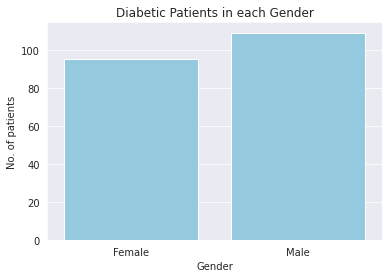

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

x = ['Female', 'Male']
y = [95,109]

plt.xlabel('Gender')
plt.ylabel('No. of patients')
plt.title('Diabetic Patients in each Gender')

sns.barplot(x, y, color='Skyblue')
plt.show()

In [ ]:
print('Majority of female diabetic patients are from:',female['Ethnicity'].mode())
print('Majority of male diabetic patients are from:',male['Ethnicity'].mode())

Majority of female diabetic patients are from: 0    Chinese
dtype: object
Majority of male diabetic patients are from: 0    Asian Indian
dtype: object


In [ ]:
ethnic= diab.loc[(diab['Diabetes']=='Yes')]
ethnic['Ethnicity'].value_counts()



Asian Indian    54
Vietnamese      49
Chinese         43
Korean          30
Filipino        24
Other            4
Name: Ethnicity, dtype: int64

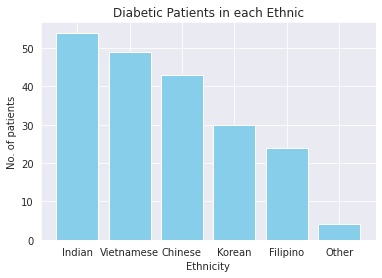

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
left = [1, 2,3,4,5,6]
height = [54,49,43,30,24,4]
tick_label = ['Indian','Vietnamese','Chinese','Korean','Filipino','Other']

plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['Skyblue'])
plt.xlabel('Ethnicity')
plt.ylabel('No. of patients')
plt.title('Diabetic Patients in each Ethnic')
plt.show()

In [ ]:
diab.groupby(['Ethnicity','Gender','Diabetes'],dropna=False).Gender.count()

Ethnicity     Gender  Diabetes
Asian Indian  Female  0           209
                      Yes          17
              Male    0           295
                      Yes          37
              NaN     0             0
Chinese       Female  0           328
                      Yes          24
              Male    0           249
                      Yes          19
              NaN     0             0
Filipino      Female  0           162
                      Yes          16
              Male    0            68
                      Yes           8
              NaN     0             0
Korean        Female  0           259
                      Yes          15
              Male    0           170
                      Yes          15
Other         Female  0            78
                      Yes           1
              Male    0            60
                      Yes           3
Vietnamese    Female  0           254
                      Yes          21
              Male 

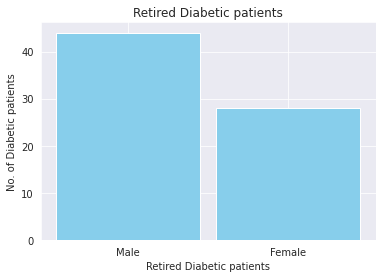

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')

left = [1,2]
height = [44,28]
tick_label = ['Male','Female']
plt.bar(left, height, tick_label = tick_label, width = 0.9, color = ['Skyblue'])
plt.xlabel('Retired Diabetic patients')
plt.ylabel('No. of Diabetic patients')
plt.title('Retired Diabetic patients')
plt.show()


MALE AGE GROUP

No of male diabetic patients in the age group 15-25: 1
No of male diabetic patients in the age group 25-35: 10
No of male diabetic patients in the age group 35-45: 12
No of male diabetic patients in the age group 35-45: 22
No of male diabetic patients in the age group 45-55: 27
No of male diabetic patients in the age group 55-65: 21
No of male diabetic patients in the age group 65-75: 15
No of male diabetic patients in the age group 75-85: 1

FEMALE AGE GROUP

No of female diabetic patients in the age group 15-25: 1
No of female diabetic patients in the age group 25-35: 9
No of female diabetic patients in the age group 35-45: 9
No of female diabetic patients in the age group 35-45: 15
No of female diabetic patients in the age group 45-55: 26
No of female diabetic patients in the age group 55-65: 25
No of female diabetic patients in the age group 65-75: 9
No of female diabetic patients in the age group 75-85: 0


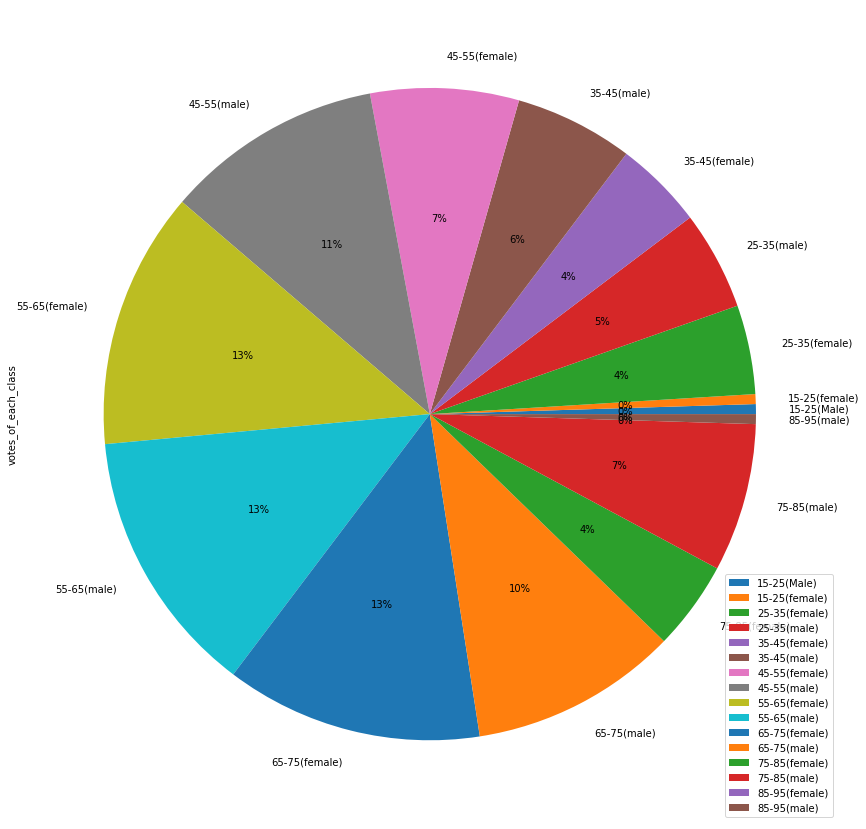

In [ ]:
print('\nMALE AGE GROUP\n')
print('No of male diabetic patients in the age group 15-25:',len(male.loc[(male['Age']>15)&(male['Age']<=25)]))
print('No of male diabetic patients in the age group 25-35:',len(male.loc[(male['Age']>25)&(male['Age']<=35)]))
print('No of male diabetic patients in the age group 35-45:',len(male.loc[(male['Age']>35)&(male['Age']<=45)]))
print('No of male diabetic patients in the age group 35-45:',len(male.loc[(male['Age']>45)&(male['Age']<=55)]))
print('No of male diabetic patients in the age group 45-55:',len(male.loc[(male['Age']>55)&(male['Age']<=65)]))
print('No of male diabetic patients in the age group 55-65:',len(male.loc[(male['Age']>65)&(male['Age']<=75)]))
print('No of male diabetic patients in the age group 65-75:',len(male.loc[(male['Age']>75)&(male['Age']<=85)]))
print('No of male diabetic patients in the age group 75-85:',len(male.loc[(male['Age']>85)&(male['Age']<=95)]))

print('\nFEMALE AGE GROUP\n')
print('No of female diabetic patients in the age group 15-25:',len(female.loc[(female['Age']>15)&(female['Age']<=25)]))
print('No of female diabetic patients in the age group 25-35:',len(female.loc[(female['Age']>25)&(female['Age']<=35)]))
print('No of female diabetic patients in the age group 35-45:',len(female.loc[(female['Age']>35)&(female['Age']<=45)]))
print('No of female diabetic patients in the age group 35-45:',len(female.loc[(female['Age']>45)&(female['Age']<=55)]))
print('No of female diabetic patients in the age group 45-55:',len(female.loc[(female['Age']>55)&(female['Age']<=65)]))
print('No of female diabetic patients in the age group 55-65:',len(female.loc[(female['Age']>65)&(female['Age']<=75)]))
print('No of female diabetic patients in the age group 65-75:',len(female.loc[(female['Age']>75)&(female['Age']<=85)]))
print('No of female diabetic patients in the age group 75-85:',len(female.loc[(female['Age']>85)&(female['Age']<=95)]))

dataframe = pd.DataFrame({'Name': ['15-25(Male)', '25-35(male)', '35-45(male)',
                                   '45-55(male)', '55-65(male)', '65-75(male)',
                                   '75-85(male)', '85-95(male)', '15-25(female)', '25-35(female)', '35-45(female)',
                                   '45-55(female)', '55-65(female)', '65-75(female)',
                                   '75-85(female)', '85-95(female)'],
                          'votes_of_each_class': [1,10,12,22,27,21,15,1,1,9,9,15,26,26,9,0]})

# Plotting the pie chart for above dataframe
dataframe.groupby(['Name']).sum().plot(
    kind='pie', y='votes_of_each_class', autopct='%1.0f%%',figsize=(15, 15))

In [ ]:
print('Marital Status of female diabetic population:',female['Marital Status'].value_counts())
print('Marital Status of male diabetic population:',male['Marital Status'].value_counts())

Marital Status of female diabetic population: Married                  69
Single                   15
Living with a partner     9
Other                     1
Name: Marital Status, dtype: int64
Marital Status of male diabetic population: Married                  90
Single                   11
Living with a partner     6
Other                     2
Name: Marital Status, dtype: int64


Male working population who are diabetic: 65
Female working population who are diabetic: 67


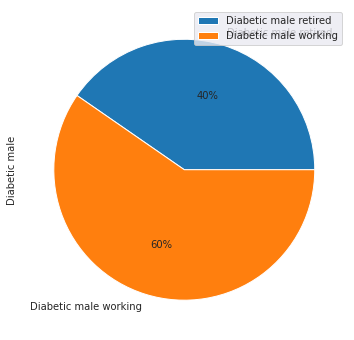

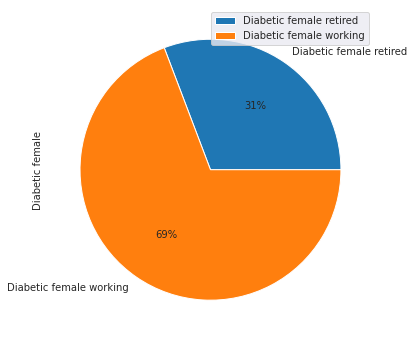

In [ ]:
male_work=male.loc[(male['Retired']!='Retired')&(male['Unemployed']!='Retired')]
female_work=female.loc[(female['Retired']!='Retired')&(female['Unemployed']!='Retired')]

print('Male working population who are diabetic:',len(male_work))
print('Female working population who are diabetic:',len(female_work))

dataframe = pd.DataFrame({'Name': ['Diabetic male working','Diabetic male retired'],
                          'Diabetic male': [65,44]})
dataframe.groupby(['Name']).sum().plot(
    kind='pie', y='Diabetic male', autopct='%1.0f%%',figsize=(8, 6))

dataframe = pd.DataFrame({'Name': ['Diabetic female working','Diabetic female retired'],
                          'Diabetic female': [63,28]})
dataframe.groupby(['Name']).sum().plot(
    kind='pie', y='Diabetic female', autopct='%1.0f%%',figsize=(6, 6))

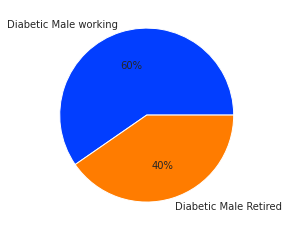

In [ ]:
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = [65,44]
keys = ['Diabetic Male working', 'Diabetic Male Retired']

# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
male_health=male.loc[(male['Hypertension']=='Yes') &(male['Retired']!='Retired')]
len(male_health)

female_health=female.loc[(female['Hypertension']=='Yes') &(female['Retired']!='Retired')]
len(female_health)

30

# Data Preprocessing

In [ ]:
diab['Physical Check-up'].value_counts()
diab[diab['Physical Check-up'].isnull()==True]
diab.loc[(diab['Physical Check-up']=='Yes') & (diab['Arthritis']=='Yes')]
diab

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,...,Social Networks (Non-city-based Ethnic),People (Non-city-based Ethnic),Other (Non-city-based Ethnic),Paper (Non-city-based General),TV/Radio (Non-city-based General),Website (Non-city-based General),Social Networks (Non-city-based General),People (Non-city-based General),Other (Non-city-based General),Preferred Type
2,1011601,23.0,Female,Chinese,Single,3.245186e+32,1.732051,0,0,0,...,No,Yes,No,No,No,No,No,Yes,No,email
9,10103,60.0,Female,Asian Indian,Single,1.667711e+33,1.732051,0,0,0,...,No,No,No,No,Yes,No,No,No,No,NaN
11,80505,43.0,Male,Vietnamese,Married,1.667711e+33,1.732051,0,0,Living with children,...,No,No,No,No,Yes,No,No,No,No,NaN
18,80121,46.0,Male,Vietnamese,Married,1.000000e+27,2.000000,0,Living with spouse,Living with children,...,No,No,No,No,No,No,No,No,No,NaN
23,11159,23.0,Male,Chinese,Living with a partner,1.000000e+27,1.000000,Living with no one,0,0,...,Yes,Yes,Yes,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,40223,70.0,Female,Other,Single,1.667711e+33,2.236068,0,0,Living with children,...,No,Yes,No,Yes,No,Yes,No,Yes,No,newsletter
2605,10330,68.0,Male,Other,Married,1.667711e+33,1.414214,0,Living with spouse,0,...,No,Yes,No,No,Yes,No,No,Yes,No,email
2606,11081000,76.0,Female,Filipino,Single,1.192533e+30,2.645751,0,0,Living with children,...,No,No,No,No,No,No,No,No,No,mail
2607,10953000,50.0,Male,Filipino,Single,1.667711e+33,2.000000,0,Living with spouse,0,...,No,Yes,No,No,No,Yes,No,No,No,website


In [ ]:
diab.isnull().sum()

Survey ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital Status                                0
Education Completed                           0
Household Size                                0
No One                                        1
Spouse                                        1
Children                                      1
Grand Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other Relative                                0
Friends                                       1
Religion                                      0
Full Time Employment                          3
Part Time Employment                          3
Self Employed Full Time                       0
Self Employed Part Time                 

# Imputing Present Mental Health and Health

In [ ]:
print(diab['Present Mental Health'].value_counts())
print(diab['Present Oral Health'].value_counts())
print(diab['Hygiene Assistance'].value_counts())
print(diab['Smoking'].value_counts())

print(diab['Drinking'].value_counts())

In [ ]:
diab['Quality of Life'].value_counts()

8.0     770
7.0     474
9.0     428
10.0    338
6.0     215
5.0     201
4.0      47
3.0      22
2.0      11
1.0       3
0.0       2
Name: Quality of Life, dtype: int64

In [ ]:
diab.loc[(diab['Present Mental Health'].isna()==True)&(diab['Quality of Life']<11.0)]
men=diab.loc[(diab['Present Mental Health'].isna()==True)]
men['Quality of Life']

diab.loc[(diab['Present Mental Health'].isna()==True)&(diab['Quality of Life']<=8.0), 'Present Mental Health']='Fair'

diab.loc[(diab['Present Mental Health'].isna()==True)&(diab['Quality of Life']<=10.0), 'Present Mental Health']='Excellent'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
diab.dropna(subset=['Present_Health'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Imputing Present Oral Health


In [ ]:
print(diab['Present Oral Health'].isnull().sum())
diab['Dentist Check-up'].value_counts()

diab.loc[(diab['Present Oral Health'].isna()==True)&(diab['Dentist Check-up']=='Yes'),'Present Oral Health']= 'Fair'
print(diab['Present Oral Health'].value_counts())
diab.loc[(diab['Present Oral Health'].isna()==True),'Present Oral Health']= 'Very Good'

0
Very Good    891
Good         774
Excellent    421
Fair         348
Poor         104
Name: Present Oral Health, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Imputing Hygiene Assistance


In [ ]:
print(diab['Hygiene_Assistance'].value_counts())
diab.loc[(diab['Hygiene_Assistance'].isna()==True)&(diab['Age']>60),'Hygiene_Assistance']=1

diab.isnull().sum()

0.0    2458
1.0      65
Name: Hygiene_Assistance, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

# Imputing Regular Exercise, Healthy Diet, Hypertension,Arthritis

In [ ]:
#diab.loc[(diab['Regular_Exercise'].isna()==True)]
diab.columns = diab.columns.str.replace(' ','_')
diab.groupby(['Regular_Exercise','Present_Health'],dropna=False).Present_Health.count()
diab.loc[(diab['Present_Health']=='Very Good')&(diab['Regular_Exercise'].isna()==True),'Regular_Exercise']=1

diab['Regular_Exercise'].isnull().sum()
diab['Regular_Exercise'].mode()
diab.dropna(subset=['Regular_Exercise'],inplace=True)
diab.dropna(subset=['Healthy_Diet'],inplace=True)
diab.dropna(subset=['Hypertension'],inplace=True)
diab.dropna(subset=['Arthritis'],inplace=True)
diab.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

# Imputing missing values of Physical Check up and Dental Check up

In [ ]:
diab.loc[(diab['Physical_Check-up'].isna()==True)]
diab['Physical_Check-up'].value_counts()

diab.loc[(diab['Physical_Check-up'].isna()==True), 'Physical_Check-up']='Yes'
diab['Dentist_Check-up'].value_counts()

diab.loc[(diab['Dentist_Check-up'].isna()==True), 'Dentist_Check-up']='Yes'
diab.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

#Imputing Unemployed

In [ ]:
diab.loc[(diab['Unemployed'].isna()==True)]
diab.loc[(diab['Unemployed'].isna()==True)&(diab['Age']<21),'Unemployed']='Unemployed'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#Imputing Other Employment and Occupation

In [ ]:
diab.drop(['Other_Employement'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
diab.isnull().sum()

Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

In [ ]:
diab['Occupation'].value_counts()

diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$70,000 and over'),'Occupation']='Business owner'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$60,000 - $69,999'),'Occupation']='Professional'

diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$0 - $9,999'),'Occupation']='Other'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$10,000 - $19,999'),'Occupation']='Other'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$20,000 - $29,999'),'Occupation']='Service worker'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$30,000 - $39,999'),'Occupation']='Other'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$40,000 - $49,999'),'Occupation']='Professional'
diab.loc[(diab['Occupation'].isna()==True)&(diab['Income']=='$50,000 - $59,999'),'Occupation']='Professional'


#diab.drop(['Other_Employement'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#Imputing Health Insurance and Dental Insurance



In [ ]:

diab.loc[diab['Health_Insurance'].isna()==True]
diab.groupby(['Health_Insurance','Income'],dropna=False).Income.count()
diab.loc[(diab['Health_Insurance'].isna()==True),"Health_Insurance"]='Yes'
diab['Health_Insurance'].isnull().sum()

diab.loc[diab['Dental_Insurance'].isna()==True]
diab.groupby(['Dental_Insurance','Income'],dropna=False).Income.count()
diab.loc[(diab['Dental_Insurance'].isna()==True)&(diab['Income']=='$0 - $9,999'),"Dental_Insurance"]=0
diab.loc[(diab['Dental_Insurance'].isna()==True)&(diab['Income']=='$30,000 - $39,999'),"Dental_Insurance"]=0
diab.loc[(diab['Dental_Insurance'].isna()==True)&(diab['Income']=='$70,000 and over'),"Dental_Insurance"]='Yes'
diab.loc[(diab['Dental_Insurance'].isna()==True)&(diab['Income']=='$10,000 - $19,999'),"Dental_Insurance"]=0
diab.loc[(diab['Dental_Insurance'].isna()==True)&(diab['Income']=='$20,000 - $29,999'),"Dental_Insurance"]=0
diab.loc[(diab['Dental_Insurance'].isna()==True),"Dental_Insurance"]='Yes'

print(diab['Dental_Insurance'].isnull().sum())
print(diab['Health_Insurance'].isnull().sum())

diab.groupby(['Dental_Insurance','Income'],dropna=False).Income.count()

0
0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Dental_Insurance  Income           
0                 $0 - $9,999            2
                  $10,000 - $19,999      1
                  $20,000 - $29,999      1
                  $30,000 - $39,999      2
                  $0 - $9,999          152
                  $10,000 - $19,999    142
                  $20,000 - $29,999    122
                  $30,000 - $39,999    112
                  $40,000 - $49,999     76
                  $50,000 - $59,999     74
                  $60,000 - $69,999     62
                  $70,000 and over     172
                  NaN                    0
Yes               $0 - $9,999           92
                  $10,000 - $19,999     54
                  $20,000 - $29,999     65
                  $30,000 - $39,999     86
                  $40,000 - $49,999     97
                  $50,000 - $59,999     96
                  $60,000 - $69,999    125
                  $70,000 and over     808
                  NaN                    0
Name: Income, dtyp

#Imputing Transportation for medical

In [ ]:
diab.isnull().sum()
diab.loc[diab['Transportation_(Medical)'].isna()==True]
diab.loc[(diab['Transportation_(Medical)'].isna()==True)&(diab['Age']>55),'Transportation_(Medical)']='Yes'
diab.loc[(diab['Transportation_(Medical)'].isna()==True),'Transportation_(Medical)']=0

diab.groupby(['Transportation_(Medical)','Income'],dropna=False).Income.count()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Transportation_(Medical)  Income           
0                         $20,000 - $29,999      2
                          $30,000 - $39,999      1
                          $40,000 - $49,999      1
                          $60,000 - $69,999      1
                          $70,000 and over       3
                          $0 - $9,999          167
                          $10,000 - $19,999    135
                          $20,000 - $29,999    138
                          $30,000 - $39,999    166
                          $40,000 - $49,999    144
                          $50,000 - $59,999    136
                          $60,000 - $69,999    156
                          $70,000 and over     858
                          NaN                    0
Yes                       $0 - $9,999           79
                          $10,000 - $19,999     62
                          $20,000 - $29,999     48
                          $30,000 - $39,999     33
                          $40,000 - $4

# Imputing Medical Interpretation

In [ ]:
diab.loc[diab['Interpretation_(Medical)'].isna()==True]
diab['Interpretation_(Medical)'].value_counts()
diab.loc[(diab['Interpretation_(Medical)'].isna()==True),'Interpretation_(Medical)']=0
diab['Interpretation_(Medical)'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0

In [ ]:
diab.isnull().sum()

Survey_ID                                     0
Age                                           0
Gender                                        0
Ethnicity                                     0
Marital_Status                                0
Education_Completed                           0
Household_Size                                0
No_One                                        1
Spouse                                        1
Children                                      1
Grand_Children                                1
Parent                                        1
Grandparent                                   0
Brother/Sister                                1
Other_Relative                                0
Friends                                       1
Religion                                      0
Full_Time_Employment                          3
Part_Time_Employment                          3
Self_Employed_Full_Time                       0
Self_Employed_Part_Time                 

In [ ]:
diab.iloc[:,63:213]

# Imputing Urgent Care, Folkmedicine, Primary care

In [ ]:
diab['Urgentcare'].value_counts()

diab.loc[(diab['Urgentcare'].isna()==True),'Urgentcare']='Yes'

In [ ]:
diab['Folkmedicine'].value_counts()
diab.loc[(diab['Folkmedicine'].isna()==True),'Folkmedicine']='Yes'

In [ ]:
diab['Primary_Care'].value_counts()

diab.loc[(diab['Primary_Care'].isna()==True),'Primary_Care']='Yes'

In [ ]:
import pandas as pd

diab = pd.read_csv(r'/content/drive/MyDrive/diab.csv')

diab

,Unnamed: 0,Survey_ID,Age,Gender,Ethnicity,Marital_Status,Education_Completed,Household_Size,No_One,Spouse,...,Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Preferred_Type
0,2,1011601,23.0,Female,Chinese,Single,3.245186e+32,1.732051,0,0,...,No,Yes,No,No,No,No,No,Yes,No,email
1,9,10103,60.0,Female,Asian Indian,Single,1.667711e+33,1.732051,0,0,...,No,No,No,No,Yes,No,No,No,No,NaN
2,11,80505,43.0,Male,Vietnamese,Married,1.667711e+33,1.732051,0,0,...,No,No,No,No,Yes,No,No,No,No,NaN
3,18,80121,46.0,Male,Vietnamese,Married,1.000000e+27,2.000000,0,Living with spouse,...,No,No,No,No,No,No,No,No,No,NaN
4,23,11159,23.0,Male,Chinese,Living with a partner,1.000000e+27,1.000000,Living with no one,0,...,Yes,Yes,Yes,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,2604,40223,70.0,Female,Other,Single,1.667711e+33,2.236068,0,0,...,No,Yes,No,Yes,No,Yes,No,Yes,No,newsletter
2518,2605,10330,68.0,Male,Other,Married,1.667711e+33,1.414214,0,Living with spouse,...,No,Yes,No,No,Yes,No,No,Yes,No,email
2519,2606,11081000,76.0,Female,Filipino,Single,1.192533e+30,2.645751,0,0,...,No,No,No,No,No,No,No,No,No,mail
2520,2607,10953000,50.0,Male,Filipino,Single,1.667711e+33,2.000000,0,Living with spouse,...,No,Yes,No,No,No,Yes,No,No,No,website


# Impute Unmeet health needs and unmeet dental needs

In [ ]:
diab['Unmet_Dental_Needs'].value_counts()
diab.loc[(diab['Unmet_Dental_Needs']==0),'Unmet_Dental_Needs']='0'

In [ ]:
diab['Unmet_Health_Need'].value_counts()
diab.loc[(diab['Unmet_Health_Need'].isna()==True),'Unmet_Health_Need']='0'

# Imputing Communication problem and Preferance

In [ ]:
diab['Comunication_Problem'].value_counts()
diab.loc[(diab['Comunication_Problem'].isna()==True),'Comunication_Problem']='0'

In [ ]:
print(diab['Preferance'].value_counts())
diab.loc[(diab['Preferance'].isnull()==True)]
diab.groupby(['Preference','Ethnicity'],dropna=False).Preferance.count()

diab.loc[(diab['Ethnicity']=='Asian Indian')&(diab['Preferance'].isnull()==True),'Preferance']=0
diab.loc[(diab['Ethnicity']=='Chinese')&(diab['Preferance'].isnull()==True),'Preferance']='Yes'
diab.loc[(diab['Ethnicity']=='Filipino')&(diab['Preferance'].isnull()==True),'Preferance']=0
diab.loc[(diab['Ethnicity']=='Korean')&(diab['Preferance'].isnull()==True),'Preferance']='Yes'
diab.loc[(diab['Ethnicity']=='Other')&(diab['Preferance'].isnull()==True),'Preferance']=0
diab.loc[(diab['Ethnicity']=='Vietnamese')&(diab['Preferance'].isnull()==True),'Preferance']='Yes'

diab.loc[(diab['Preferance']==0),'Preferance']='0'

Yes    1302
0      1220
Name: Preferance, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

diab=pd.read_csv(r'/content/drive/MyDrive/diab_imputed.csv')
diab.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=0)

,Survey_ID,Age,Gender,Ethnicity,Marital_Status,Education_Completed,Household_Size,No_One,Spouse,Children,...,People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Preferred_Type,Unmet_Health_Needs
0,1011601,23.0,Female,Chinese,Single,3.245186e+32,1.732051,0,0,0,...,Yes,No,No,No,No,No,Yes,No,email,NaN
1,10103,60.0,Female,Asian Indian,Single,1.667711e+33,1.732051,0,0,0,...,No,No,No,Yes,No,No,No,No,NaN,NaN
2,80505,43.0,Male,Vietnamese,Married,1.667711e+33,1.732051,0,0,Living with children,...,No,No,No,Yes,No,No,No,No,NaN,NaN
3,80121,46.0,Male,Vietnamese,Married,1.000000e+27,2.000000,0,Living with spouse,Living with children,...,No,No,No,No,No,No,No,No,NaN,NaN
4,11159,23.0,Male,Chinese,Living with a partner,1.000000e+27,1.000000,Living with no one,0,0,...,Yes,Yes,No,No,No,No,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,40223,70.0,Female,Other,Single,1.667711e+33,2.236068,0,0,Living with children,...,Yes,No,Yes,No,Yes,No,Yes,No,newsletter,NaN
2518,10330,68.0,Male,Other,Married,1.667711e+33,1.414214,0,Living with spouse,0,...,Yes,No,No,Yes,No,No,Yes,No,email,NaN
2519,11081000,76.0,Female,Filipino,Single,1.192533e+30,2.645751,0,0,Living with children,...,No,No,No,No,No,No,No,No,mail,NaN
2520,10953000,50.0,Male,Filipino,Single,1.667711e+33,2.000000,0,Living with spouse,0,...,Yes,No,No,No,Yes,No,No,No,website,NaN


In [ ]:
s=diab.pop('Diabetes')
diab.insert(215,'Diabetes',s)

x=diab.iloc[:,2:215]
y=diab.iloc[:,215]

#One Hot Encoding/ creating dummy features

In [ ]:
ohe_diab = pd.get_dummies(diab, columns = ['Gender'],drop_first=True)
ohe_diab

,Unnamed: 0,Unnamed: 0.1,Survey_ID,Age,Ethnicity,Marital_Status,Education_Completed,Household_Size,No_One,Spouse,...,Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General),Preferred_Type,Unmet_Health_Needs,Gender_Male
0,0,2,1011601,23.0,Chinese,Single,3.245186e+32,1.732051,0,0,...,No,No,No,No,No,Yes,No,email,NaN,0
1,1,9,10103,60.0,Asian Indian,Single,1.667711e+33,1.732051,0,0,...,No,No,Yes,No,No,No,No,NaN,NaN,0
2,2,11,80505,43.0,Vietnamese,Married,1.667711e+33,1.732051,0,0,...,No,No,Yes,No,No,No,No,NaN,NaN,1
3,3,18,80121,46.0,Vietnamese,Married,1.000000e+27,2.000000,0,Living with spouse,...,No,No,No,No,No,No,No,NaN,NaN,1
4,4,23,11159,23.0,Chinese,Living with a partner,1.000000e+27,1.000000,Living with no one,0,...,Yes,No,No,No,No,No,No,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,2517,2604,40223,70.0,Other,Single,1.667711e+33,2.236068,0,0,...,No,Yes,No,Yes,No,Yes,No,newsletter,NaN,0
2518,2518,2605,10330,68.0,Other,Married,1.667711e+33,1.414214,0,Living with spouse,...,No,No,Yes,No,No,Yes,No,email,NaN,1
2519,2519,2606,11081000,76.0,Filipino,Single,1.192533e+30,2.645751,0,0,...,No,No,No,No,No,No,No,mail,NaN,0
2520,2520,2607,10953000,50.0,Filipino,Single,1.667711e+33,2.000000,0,Living with spouse,...,No,No,No,Yes,No,No,No,website,NaN,1


In [ ]:
#diab['Gender'] = diab['Gender'].astype(float)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = le.fit_transform(diab['Gender'])

In [ ]:
diab.to_csv('diab_imputed.csv')

#Imputing missing values in members of household

In [ ]:
m=diab.select_dtypes(exclude=['object']).columns.tolist()
noncat_diab=diab.drop(columns=m,axis=1,inplace=False)

len(noncat_diab.columns)

181

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', 500)
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       1
Grand_Children                                 1
Parent                                         1
Grandparent                                    0
Brother/Sister                                 1
Other_Relative                                 0
Friends                                        1
Religion                                       0
Full_Time_Employment                           3
Part_Time_Employment

In [ ]:


diab.loc[(diab['Children'].isnull()==True),'Children']=0
diab.loc[(diab['Grand_Children'].isna()==True),'Grand_Children']=0
diab.loc[(diab['Parent'].isna()==True),'Parent']=0
diab.loc[(diab['Grandparent'].isna()==True),'Grandparent']=0
diab.loc[(diab['Brother/Sister'].isna()==True),'Brother/Sister']=0
diab.loc[(diab['Friends'].isna()==True),'Friends']=0
diab.loc[(diab['Unemployed'].isna()==True),'Unemployed']='Unemployed'
diab.loc[(diab['Full_Time_Employment'].isna()==True),'Full_Time_Employment']=0
diab.loc[(diab['Part_Time_Employment'].isna()==True),'Part_Time_Employment']=0

#Imputing Source of Health Information

In [ ]:
f=diab['Family'].mode()
print(diab['Close_Friend'].mode())
print(diab['Acquaintances'].mode())
print(diab['Heal_Professionals'].mode())
print(diab['Mobile_Apps'].mode())
print(diab['Email'].mode())
print(diab['Social_Networks'].mode())
print(diab['Online_Communities'].mode())
print(diab['Health_Website'].mode())


diab.loc[(diab['Family'].isnull()==True),'Family']='Yes'
diab.loc[(diab['Close_Friend'].isnull()==True),'Close_Friend']='No'
diab.loc[(diab['Acquaintances'].isnull()==True),'Acquaintances']='No'
diab.loc[(diab['Heal_Professionals'].isnull()==True),'Heal_Professionals']='No'
diab.loc[(diab['Mobile_Apps'].isnull()==True),'Mobile_Apps']='No'
diab.loc[(diab['Email'].isnull()==True),'Email']='No'
diab.loc[(diab['Social_Networks'].isnull()==True),'Social_Networks']='No'
diab.loc[(diab['Online_Communities'].isnull()==True),'Online_Communities']='No'
diab.loc[(diab['Health_Website'].isnull()==True),'Health_Website']='No'
diab.isnull().sum()

0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object
0    No
dtype: object


Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

In [ ]:
diab['Source_of_Health_Information'].value_counts()
diab.loc[(diab['Source_of_Health_Information'].isnull()==True),'Source_of_Health_Information']=0

diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

#Imputing quality of Life

In [ ]:
diab['Quality_of_Life'].value_counts()
diab.loc[(diab['Quality_of_Life'].isnull()==True)]

diab.loc[(diab['Quality_of_Life'].isnull()==True),'Quality_of_Life']=8.0

diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

#Imputing Satisfied_with_life_1 and  Satisfied_with_life_2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

diab=pd.read_csv(r'/content/drive/MyDrive/diab_imputed.csv')

In [ ]:
pd.set_option('display.max_rows', 500)
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

In [ ]:
diab['Satisfied_With_Life_1'].value_counts()

Agree                        973
Slightly agree               631
Neither agree or disagree    429
Strongly agree               227
Slightly disagree            141
Disagree                      81
Strongly disagree             40
Name: Satisfied_With_Life_1, dtype: int64

In [ ]:
diab['Satisfied_With_Life_1']=diab['Satisfied_With_Life_1'].fillna(method='bfill')
diab['Satisfied_With_Life_1'].isnull().sum()

diab['Satisfied_With_Life_2']=diab['Satisfied_With_Life_2'].fillna(method='bfill')
diab['Satisfied_With_Life_2'].isnull().sum()

0

#Imputing values in Psychiatrist, General Practitioner, Therapist/Counsellor, Religious Leader

In [ ]:
mh=diab.loc[(diab['Psychiatrist'].isnull()==True)]
diab.groupby(['Psychiatrist','Present_Health'],dropna=False).Present_Health.count()

Psychiatrist  Present_Health
0.0           Excellent         518
              Fair              223
              Good              768
              Poor               37
              Very Good         976
Name: Present_Health, dtype: int64

In [ ]:
diab['Psychiatrist']=diab['Psychiatrist'].fillna(method='bfill')
diab.isnull().sum()

#diab['Satisfied_With_Life_2']=diab['Satisfied_With_Life_2'].fillna(method='bfill')
#diab['Satisfied_With_Life_2'].isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

In [ ]:
diab['General_Practitioner']=diab['General_Practitioner'].fillna(method='bfill')
diab['General_Practitioner'].isnull().sum()

diab['Therapist/Counselor_']=diab['Therapist/Counselor_'].fillna(method='bfill')
diab['Therapist/Counselor_'].isnull().sum()

diab['Religious_Leader']=diab['Religious_Leader'].fillna(method='bfill')
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

#Imputing missing values in Weakness, Shame, Disappoinment, Disclosure, Antidepressants, Danger, Recovery, Treatment, Counseling,preference

In [ ]:
diab['Antidepressants'].value_counts()

diab['Weakness']=diab['Weakness'].fillna(method='bfill')
diab['Shame']=diab['Shame'].fillna(method='bfill')
diab['Disappointment']=diab['Disappointment'].fillna(method='bfill')
diab['Disclosure']=diab['Disclosure'].fillna(method='bfill')
diab['Antidepressants']=diab['Antidepressants'].fillna(method='bfill')
diab['Danger']=diab['Danger'].fillna(method='bfill')
diab['Recovery']=diab['Recovery'].fillna(method='bfill')
diab['Treatment']=diab['Treatment'].fillna(method='bfill')
diab['Counseling']=diab['Counseling'].fillna(method='bfill')
diab['Preference']=diab['Preference'].fillna(method='bfill')

In [ ]:
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

# Imputing Missing values in Knowledge, Diagnosed, Concern_for_Self_(AD),Concer_for_Others(AD), Prevention, Plan_(AD), Education_(AD), Services_(AD),Language_Barrier_(AD), Fate_(AD), Aging_(AD), Embarrasing_(AD), Avoidance_(AD), Cure_(AD), Nursing_Home(AD)

In [ ]:
diab['Knowledge']=diab['Knowledge'].fillna(method='bfill')
diab['Diagnosed']=diab['Diagnosed'].fillna(method='bfill')
diab['Concern_for_Self_(AD)']=diab['Concern_for_Self_(AD)'].fillna(method='bfill')
diab['Concern_for_Others_(AD)']=diab['Concern_for_Others_(AD)'].fillna(method='bfill')
diab['Prevention']=diab['Prevention'].fillna(method='bfill')
diab['Plan_(AD)']=diab['Plan_(AD)'].fillna(method='bfill')
diab['Education_(AD)']=diab['Education_(AD)'].fillna(method='bfill')
diab['Services_(AD)']=diab['Services_(AD)'].fillna(method='bfill')
diab['Language_Barrier_(AD)']=diab['Language_Barrier_(AD)'].fillna(method='bfill')
diab['Fate_(AD)']=diab['Fate_(AD)'].fillna(method='bfill')

In [ ]:
diab['Aging_(AD)']=diab['Aging_(AD)'].fillna(method='bfill')
diab['Embarrassing_(AD)']=diab['Embarrassing_(AD)'].fillna(method='bfill')
diab['Avoidance_(AD)']=diab['Avoidance_(AD)'].fillna(method='bfill')
diab['Cure_(AD)']=diab['Cure_(AD)'].fillna(method='bfill')
diab['Nursing_Home_(AD)']=diab['Nursing_Home_(AD)'].fillna(method='bfill')

In [ ]:
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment

In [ ]:
diab.to_csv('diab_imputed.csv')

#Imputing Advanced_Directives, Have_an_Advanced_Directive, Superstition, See_Family, close_Family

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

diab=pd.read_csv(r'/content/drive/MyDrive/diab_imputed (1).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_rows', 500)
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Unnamed: 0.1.1                                 0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment

In [ ]:
diab.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=0)

In [ ]:
diab['Advanced_Directives']=diab['Advanced_Directives'].fillna(method='bfill')
diab['Have_an_Advanced_Directive']=diab['Have_an_Advanced_Directive'].fillna(method='bfill')
diab['Superstition']=diab['Superstition'].fillna(method='bfill')
diab['See_Family']=diab['See_Family'].fillna(method='bfill')
diab['Close_Family']=diab['Close_Family'].fillna(method='bfill')

diab.isnull().sum()

#Imputing missing values in Helpful_Family,See_Friends, Close_Friends, Helpful_Friends, See_Friends, Family_Respect

In [ ]:
diab['Helpful_Family']=diab['Helpful_Family'].fillna(method='bfill')
diab['See_Friends']=diab['See_Friends'].fillna(method='bfill')
diab['Close_Friends']=diab['Close_Friends'].fillna(method='bfill')
diab['Helpful_Friends']=diab['Helpful_Friends'].fillna(method='bfill')
diab['Family_Respect']=diab['Family_Respect'].fillna(method='bfill')
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Unnamed: 0.1.1                                 0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment

#Imputing missing values in Similar_Values, Successful_Family, Trust, Loyalty, Family_Pride, Expression, Spend_Time_Together, Feel_Close_, Togetherness, Religious_Attendance, Religious_Importance

In [ ]:
diab['Similar_Values']=diab['Similar_Values'].fillna(method='bfill')
diab['Successful_Family']=diab['Successful_Family'].fillna(method='bfill')
diab['Trust']=diab['Trust'].fillna(method='bfill')
diab['Loyalty']=diab['Loyalty'].fillna(method='bfill')
diab['Family_Pride']=diab['Family_Pride'].fillna(method='bfill')
diab['Expression']=diab['Expression'].fillna(method='bfill')
diab['Spend_Time_Together']=diab['Spend_Time_Together'].fillna(method='bfill')
diab['Feel_Close_']=diab['Feel_Close_'].fillna(method='bfill')
diab['Togetherness']=diab['Togetherness'].fillna(method='bfill')
diab['Religious_Attendance']=diab['Religious_Attendance'].fillna(method='bfill')
diab['Religious_Importance']=diab['Religious_Importance'].fillna(method='bfill')
diab.isnull().sum()

Unnamed: 0                                     0
Unnamed: 0.1                                   0
Unnamed: 0.1.1                                 0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment

#Imputing missing values in Close-knit_Community,Helpful_Community, Community_Shares_Values, Get_Along, Community_Trust, Residency, Place_to_Live, Raising_Children, Place_to_Work

In [ ]:
diab['Close-knit_Community']=diab['Close-knit_Community'].fillna(method='bfill')
diab['Helpful_Community']=diab['Helpful_Community'].fillna(method='bfill')
diab['Community_Shares_Values']=diab['Community_Shares_Values'].fillna(method='bfill')
diab['Get_Along']=diab['Get_Along'].fillna(method='bfill')
diab['Community_Trust']=diab['Community_Trust'].fillna(method='bfill')
diab['Residency_']=diab['Residency_'].fillna(method='bfill')
diab['Place_to_Live']=diab['Place_to_Live'].fillna(method='bfill')
diab['Place_to_Work']=diab['Place_to_Work'].fillna(method='bfill')
diab['Raising_Children']=diab['Raising_Children'].fillna(method='bfill')

In [ ]:
diab.to_csv('imputed_diab.csv')

In [ ]:
diab['Age']

42.54311622935558

In [ ]:
diab['Age'].var()

288.3216327462838

#Data preprocessing for numerical features


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

diab=pd.read_csv(r'/content/drive/MyDrive/imputed_diab.csv')
diab.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1,inplace=True)



In [ ]:
len(diab_final.columns)

In [ ]:
pd.set_option('display.max_rows', 500)
diab.isnull().sum()

Unnamed: 0.2                                   0
Survey_ID                                      0
Age                                            0
Gender                                         0
Ethnicity                                      0
Marital_Status                                 0
Education_Completed                            0
Household_Size                                 0
No_One                                         1
Spouse                                         1
Children                                       0
Grand_Children                                 0
Parent                                         0
Grandparent                                    0
Brother/Sister                                 0
Other_Relative                                 0
Friends                                        0
Religion                                       0
Full_Time_Employment                           0
Part_Time_Employment                           0
Self_Employed_Full_T

In [ ]:
diab.drop(columns=['Preferred_Type','Unmet_Health_Needs'],axis=0,inplace=True)

In [ ]:
for column in diab.iloc[:,:]:
  diab[column]=diab[column].fillna(method='bfill')

In [ ]:
diab=diab.dropna(inplace=False,axis=0)

In [ ]:
diab_cat=diab.select_dtypes(include=['object'])
diab_num=diab.select_dtypes(exclude=['object'])

In [ ]:
diab.nunique()

Unnamed: 0.2                                2519
Survey_ID                                   2512
Age                                           73
Gender                                         2
Ethnicity                                      6
Marital_Status                                 4
Education_Completed                           17
Household_Size                                 8
No_One                                         2
Spouse                                         2
Children                                       2
Grand_Children                                 2
Parent                                         2
Grandparent                                    2
Brother/Sister                                 2
Other_Relative                                 2
Friends                                        2
Religion                                       7
Full_Time_Employment                           2
Part_Time_Employment                           2
Self_Employed_Full_T

In [ ]:
c=diab_num.columns[diab_num.nunique() <=2]

diab_num.drop(columns=c,inplace=True)


In [ ]:
diab_final=pd.get_dummies(diab_cat,drop_first=True)

In [ ]:
diab_cat

,Gender,Ethnicity,Marital_Status,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,Brother/Sister,...,Website_(Non-city-based_Ethnic),Social_Networks_(Non-city-based_Ethnic),People_(Non-city-based_Ethnic),Other_(Non-city-based_Ethnic),Paper_(Non-city-based_General),TV/Radio_(Non-city-based_General),Website_(Non-city-based_General),Social_Networks_(Non-city-based_General),People_(Non-city-based_General),Other_(Non-city-based_General)
0,Female,Chinese,Single,0,0,0,0,Living with parents,0.0,0,...,No,No,Yes,No,No,No,No,No,Yes,No
1,Female,Asian Indian,Single,0,0,0,0,Living with parents,0.0,0,...,No,No,No,No,No,Yes,No,No,No,No
2,Male,Vietnamese,Married,0,0,Living with children,0,0,0.0,0,...,No,No,No,No,No,Yes,No,No,No,No
3,Male,Vietnamese,Married,0,Living with spouse,Living with children,0,0,0.0,0,...,No,No,No,No,No,No,No,No,No,No
4,Male,Chinese,Living with a partner,Living with no one,0,0,0,0,0.0,0,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Male,Other,Married,0,Living with spouse,Living with children,0,0,0.0,0,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2515,Male,Other,Married,0,Living with spouse,0,0,0,0.0,0,...,Yes,No,Yes,No,No,No,No,No,No,No
2516,Male,Other,Married,0,Living with spouse,0,0,0,0.0,0,...,No,Yes,Yes,Yes,No,No,No,No,No,No
2517,Female,Other,Single,0,0,Living with children,Living with grandchildren,0,0.0,0,...,No,No,Yes,No,Yes,No,Yes,No,Yes,No


In [ ]:
diab_final=pd.concat([diab_final, diab_num], axis=1)

In [ ]:
pd.set_option('display.max_rows', 5000)
diab_final.isnull().sum()

Gender_Male                                                   0
Ethnicity_Chinese                                             0
Ethnicity_Filipino                                            0
Ethnicity_Korean                                              0
Ethnicity_Other                                               0
Ethnicity_Vietnamese                                          0
Marital_Status_Married                                        0
Marital_Status_Other                                          0
Marital_Status_Single                                         0
No_One_Living with no one                                     0
Spouse_Living with spouse                                     0
Children_Living with children                                 0
Grand_Children_Living with grandchildren                      0
Parent_Living with parents                                    0
Grandparent_Living with Grandparent                           0
Brother/Sister_Living with brothers/sist